In [ ]:
import pathlib
import pandas as pd
import PIL.Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
file = pathlib.Path(".") / "submission.csv"
df = pd.read_csv(file)
df

In [ ]:
img = PIL.Image.open(pathlib.Path(".") / "test" / "b" / "mask.png")
img.size

In [238]:
out_img = np.zeros((img.size[1], img.size[0], 1), dtype=np.uint8)
predicted = df["Predicted"].loc[1]
predicted = list(map(int, predicted.split(" ")))
starts = []
for i in range(0, len(predicted), 2):
    starts.append(i)
    start = predicted[i]
    count = predicted[i + 1]
    x1 = start % img.size[0]
    y1 = start // img.size[0]
    for i in range(count):
        assert out_img[y1, x1, 0] == 0
        out_img[y1, x1, 0] = 255
        x1 += 1
        if x1 >= img.size[0]:
            x1 %= img.size[0]
            y1 += 1   

assert starts == sorted(starts)

out_img.shape, np.min(out_img), np.max(out_img)

((5454, 6330, 1), 0, 255)

In [239]:
2727 * 6330

17261910

In [240]:
out_img[:, :, 0].shape

(5454, 6330)

In [241]:
12670 / 6330

2.0015797788309637

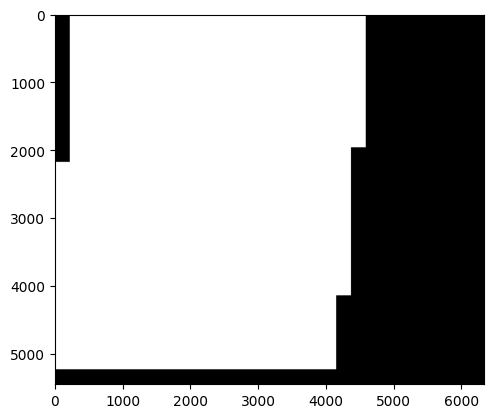

In [242]:
plt.imshow(out_img[:, :, 0], cmap="gray")